## I. IMPORTING LIBRARIES

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
dataset = pd.read_csv('churn_data.csv')

## II. EDA

In [34]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [35]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [ ]:
# Removing NaN

In [38]:
dataset.housing.value_counts()

,count
housing,
na,13860
R,10969
O,2171


In [39]:
dataset.isna().any()

,0
user,False
churn,False
age,True
housing,False
credit_score,True
deposits,False
withdrawal,False
purchases_partners,False
purchases,False
cc_taken,False


In [40]:
dataset.isna().sum()

,0
user,0
churn,0
age,4
housing,0
credit_score,8031
deposits,0
withdrawal,0
purchases_partners,0
purchases,0
cc_taken,0


In [41]:
dataset = dataset[pd.notnull(dataset['age'])]

In [42]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [43]:
dataset

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,0,0,0,0,0,81,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26996,4116,1,26.0,na,0,0,2,0,0,1,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26997,23740,0,22.0,na,0,0,37,0,0,98,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26998,47663,1,46.0,na,2,0,16,2,0,58,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


In [44]:
# Historgrams
dataset2 = dataset.drop(columns=['user', 'churn'])

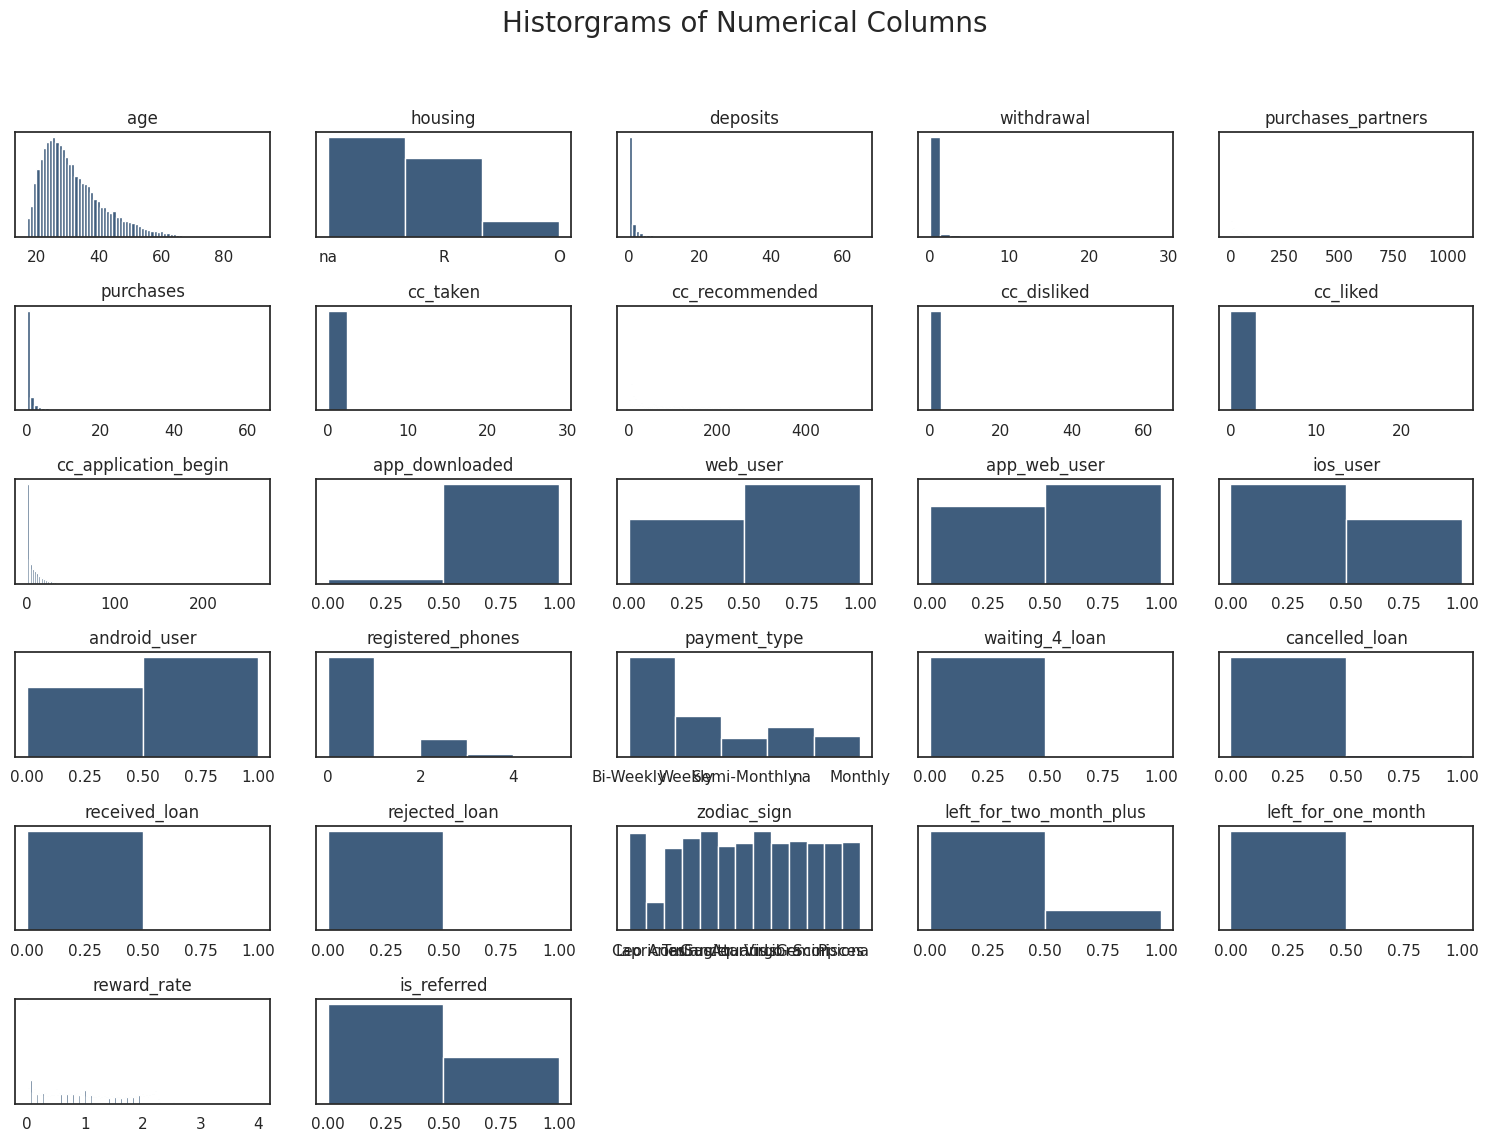

In [45]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Historgrams of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6, 5, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i - 1])

  vals = np.size(dataset2.iloc[:, i - 1].unique())

  plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [46]:
# Pie Plots
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

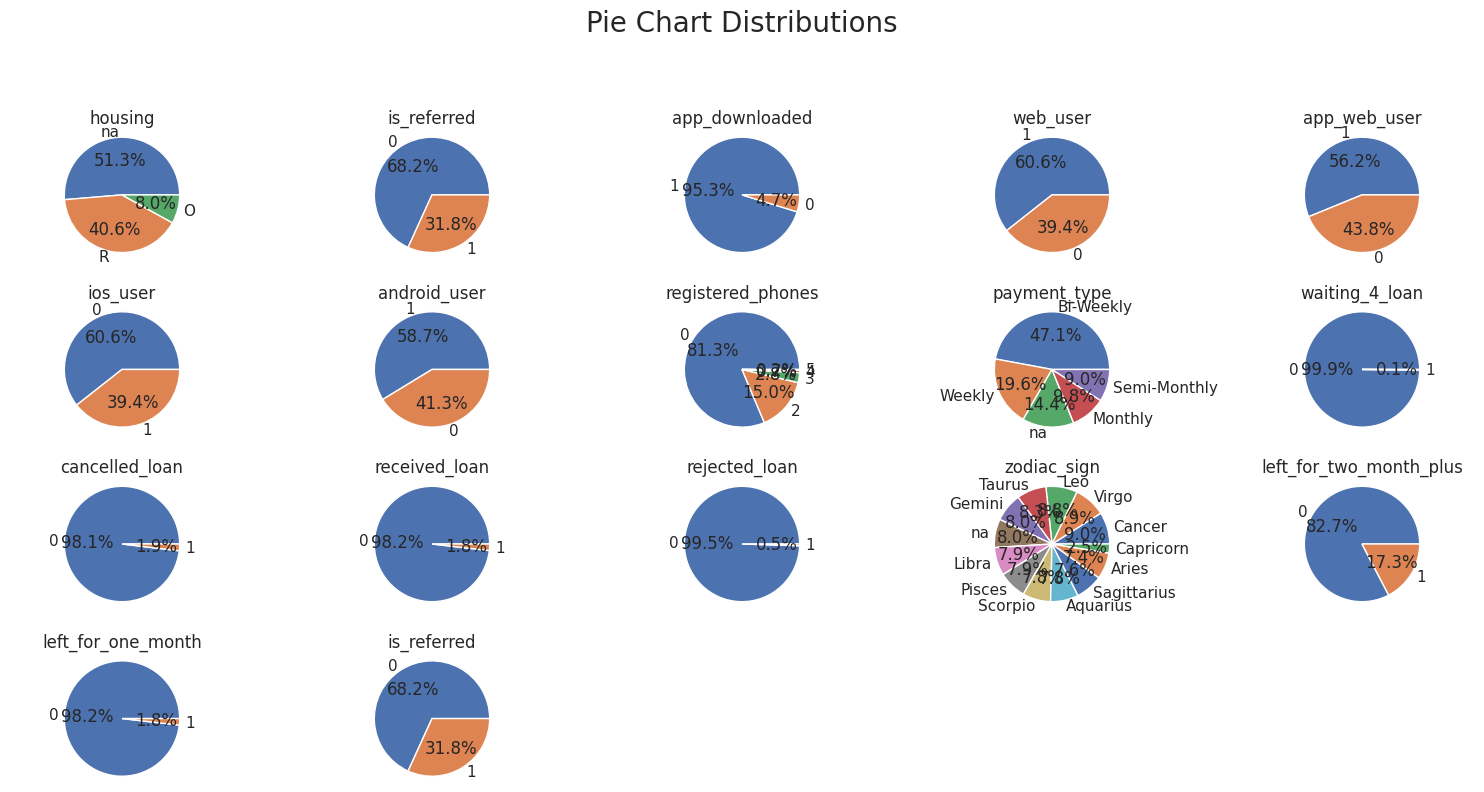

In [47]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6, 5, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i - 1])

  values = dataset2.iloc[:, i - 1].value_counts(normalize=True).values
  index = dataset2.iloc[:, i - 1].value_counts(normalize=True).index

  plt.pie(values, labels=index, autopct='%1.1f%%')
  plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [48]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

,count
churn,
0,27
1,8


In [49]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

,count
churn,
1,274
0,234


In [50]:
dataset[dataset2.received_loan == 1].churn.value_counts()

,count
churn,
1,292
0,199


In [51]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

,count
churn,
1,107
0,25


In [52]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

,count
churn,
1,266
0,222


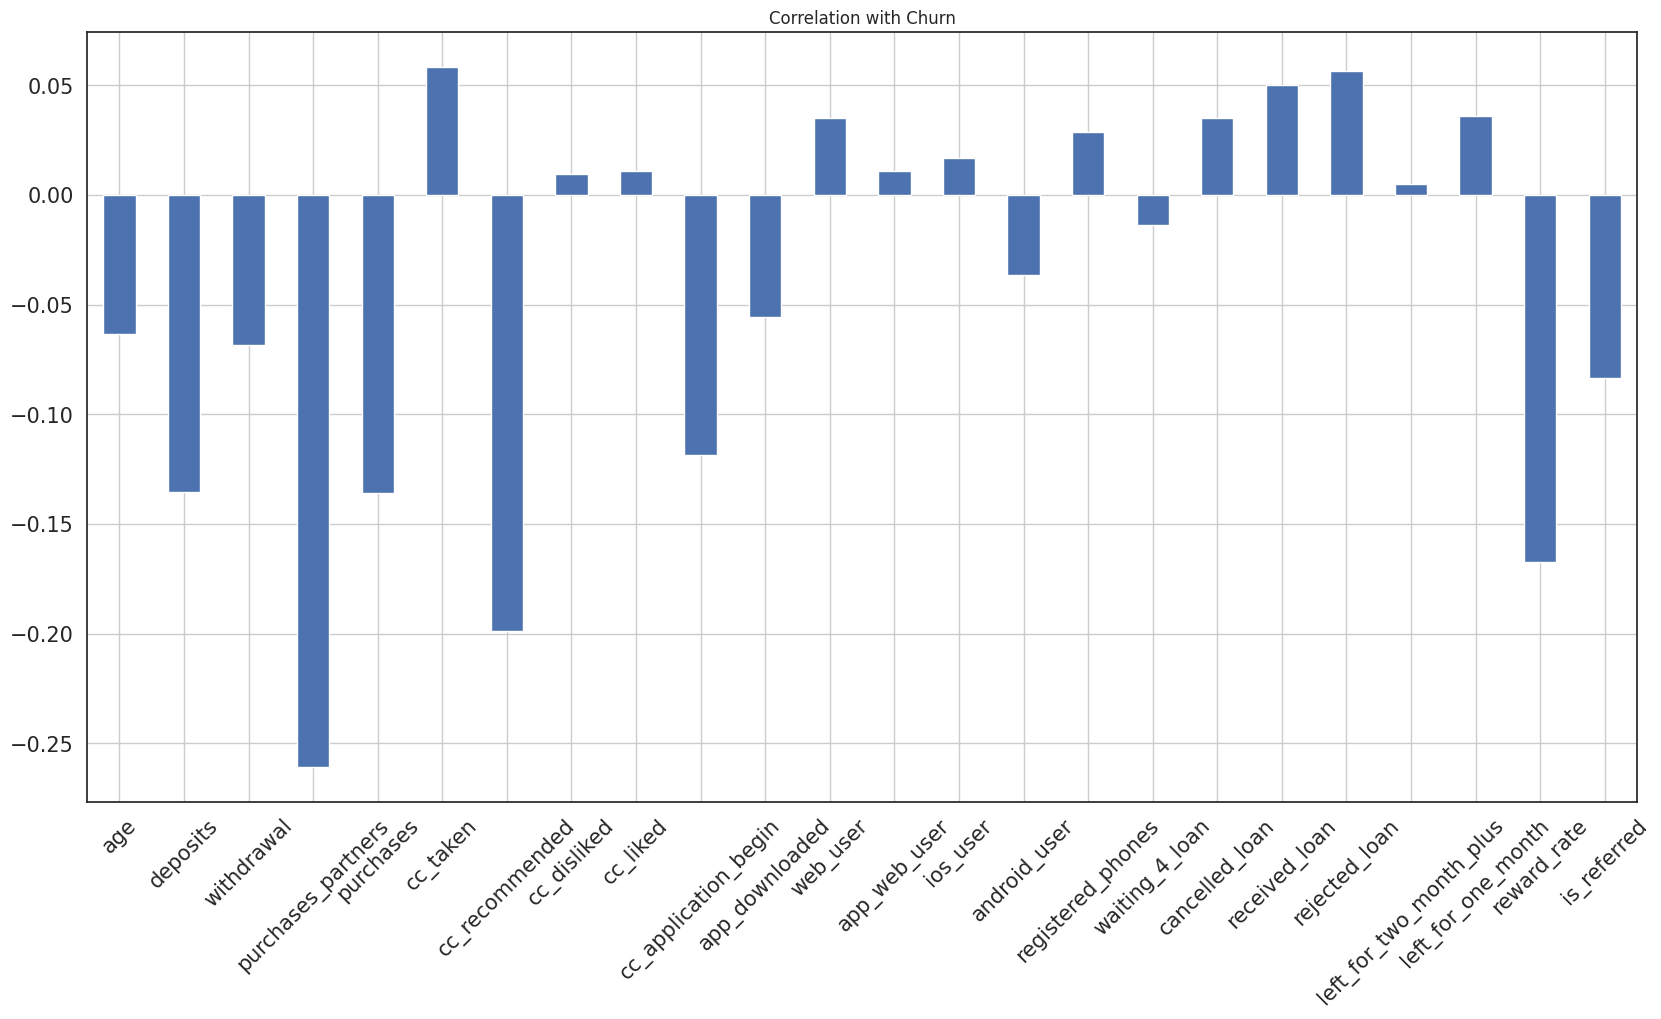

In [53]:
## Exploring Uneven Features
dataset.drop(columns=['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
    figsize=(20, 10), title='Correlation with Churn',
    fontsize=15, rot=45, grid=True
)
plt.show()

<Axes: >

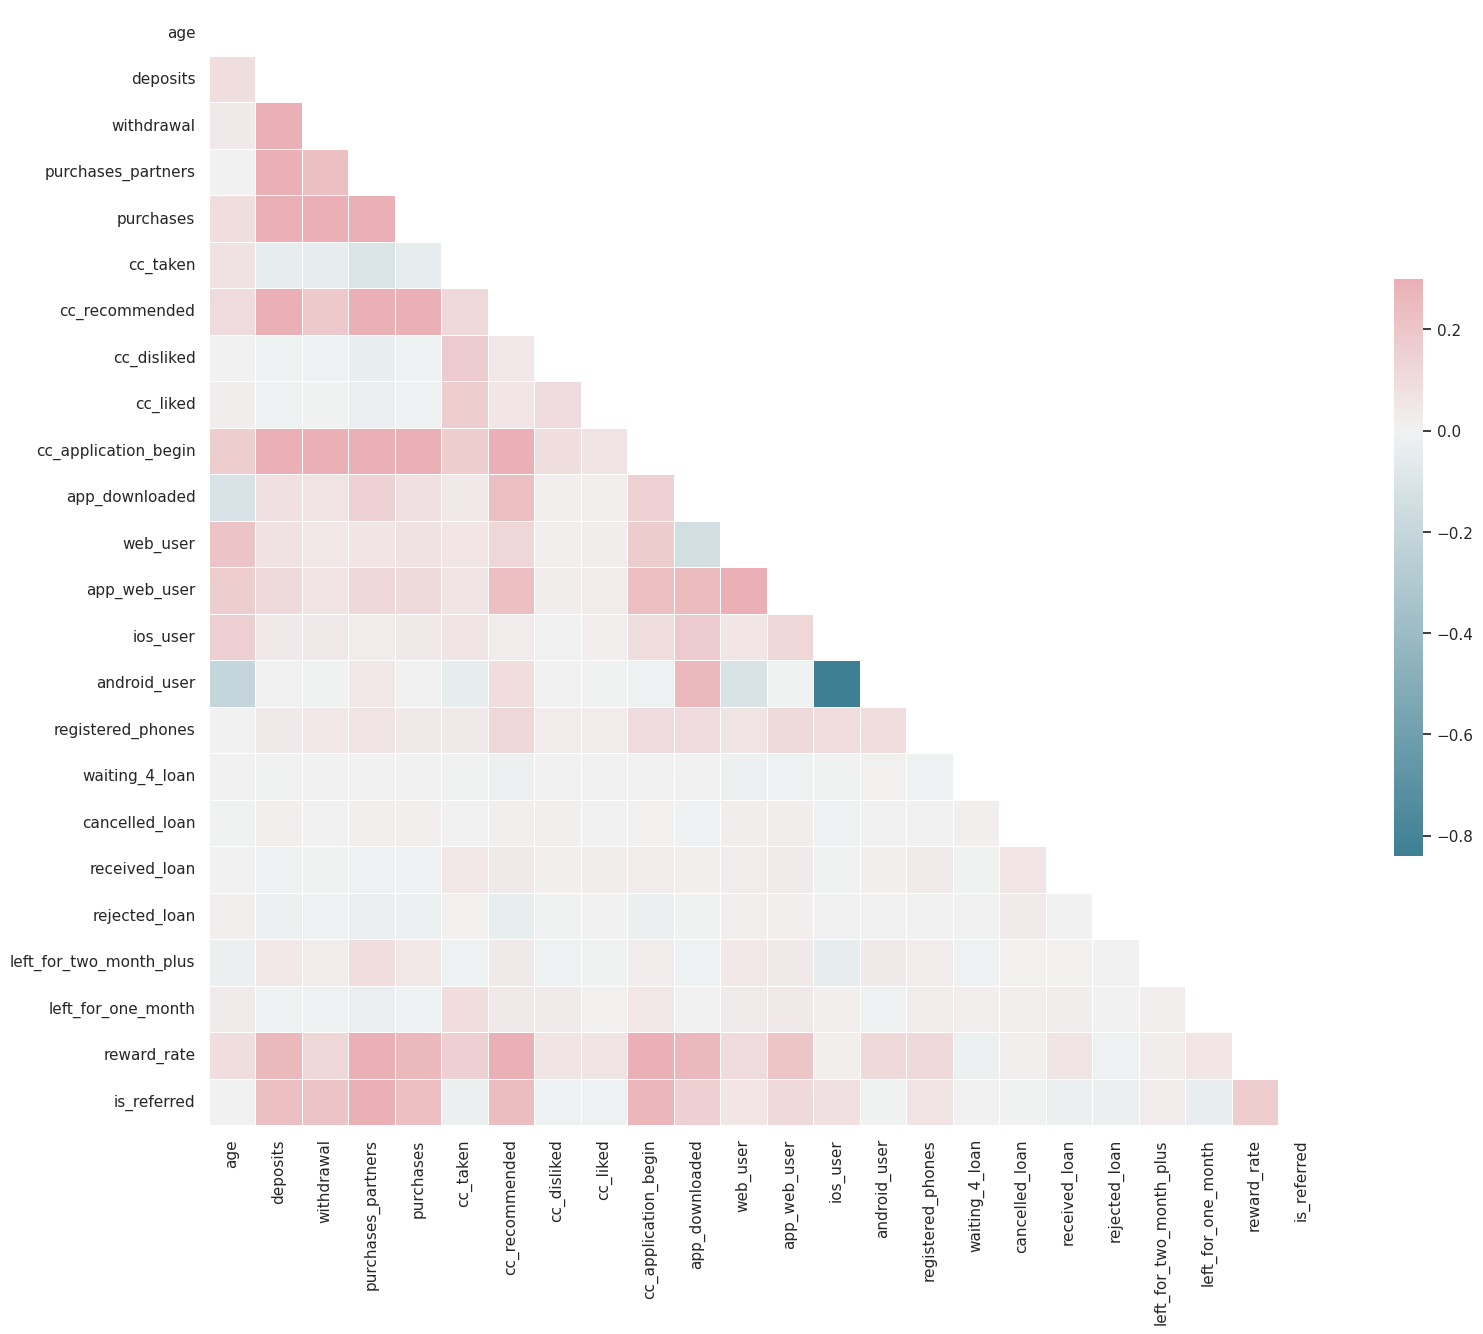

In [56]:
## Correlation Matrix
sns.set(style='white')
corr = dataset.drop(columns=['user', 'churn', 'housing', 'payment_type', 'zodiac_sign']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': .5})

In [57]:
dataset = dataset.drop(columns=['app_web_user'])
dataset.to_csv('new_churn_data.csv', index=False)